<a href="https://colab.research.google.com/github/Manash-Christ/AML-Trimester-2/blob/main/Practice2-knn/naive-bayes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


#### Data desc

In [98]:
df=pd.read_csv('data - data.csv')
df.head(2)

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,02-05-2014 0:00,313000.0,3,1.5,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,02-05-2014 0:00,2384000.0,5,2.5,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA


In [99]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
price,4600.0,551962.988473,563834.702547,0.0,322875.00,460943.46155,654962.50,26590000.0
bedrooms,4600.0,3.400870,0.908848,0.0,3.00,3.00000,4.00,9.0
bathrooms,4600.0,2.160815,0.783781,0.0,1.75,2.25000,2.50,8.0
sqft_living,4600.0,2139.346957,963.206916,370.0,1460.00,1980.00000,2620.00,13540.0
sqft_lot,4600.0,14852.516087,35884.436145,638.0,5000.75,7683.00000,11001.25,1074218.0
floors,4600.0,1.512065,0.538288,1.0,1.00,1.50000,2.00,3.5
waterfront,4600.0,0.007174,0.084404,0.0,0.00,0.00000,0.00,1.0
view,4600.0,0.240652,0.778405,0.0,0.00,0.00000,0.00,4.0
condition,4600.0,3.451739,0.677230,1.0,3.00,3.00000,4.00,5.0
sqft_above,4600.0,1827.265435,862.168977,370.0,1190.00,1590.00000,2300.00,9410.0


In [100]:
print(df.info(verbose=True),df.memory_usage(deep=True))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4600 non-null   object 
 1   price          4600 non-null   float64
 2   bedrooms       4600 non-null   int64  
 3   bathrooms      4600 non-null   float64
 4   sqft_living    4600 non-null   int64  
 5   sqft_lot       4600 non-null   int64  
 6   floors         4600 non-null   float64
 7   waterfront     4600 non-null   int64  
 8   view           4600 non-null   int64  
 9   condition      4600 non-null   int64  
 10  sqft_above     4600 non-null   int64  
 11  sqft_basement  4600 non-null   int64  
 12  yr_built       4600 non-null   int64  
 13  yr_renovated   4600 non-null   int64  
 14  street         4600 non-null   object 
 15  city           4600 non-null   object 
 16  statezip       4600 non-null   object 
 17  country        4600 non-null   object 
dtypes: float

In [101]:
# Date time column is not needed in cross-section data. Droping 'date' columns.
df.drop(['date'],axis=1,inplace=True)

In [102]:
if df.isnull().sum().sum() == 0:
  print("No Nulls found!")

No Nulls found!


#### Separating columns according to data type

In [83]:
ints = [x for x in df.columns if str(df[x].dtype) == 'int64']
flts = [x for x in df.drop('price',axis=1).columns if str(df[x].dtype) == 'float64']
objs = [x for x in df.columns if str(df[x].dtype) == 'object']

#### Plotting bar with other columns

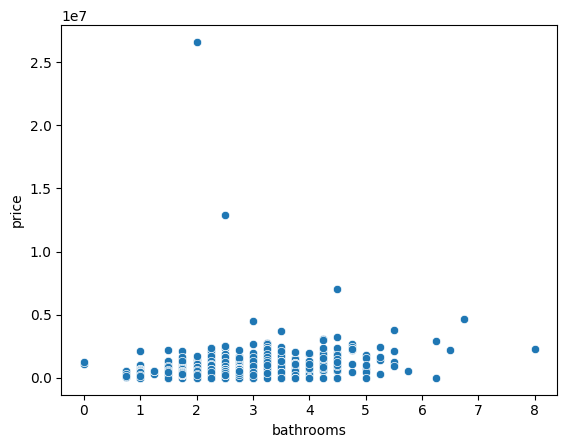

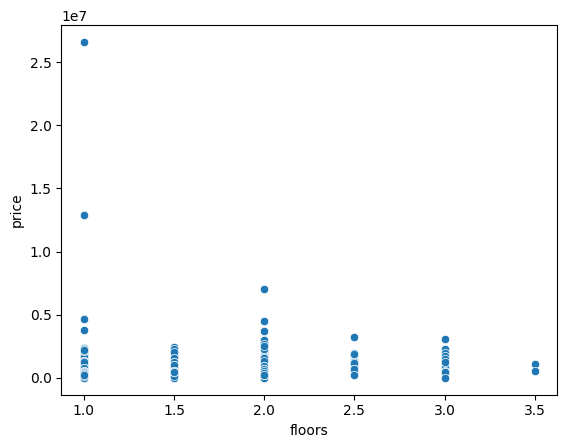

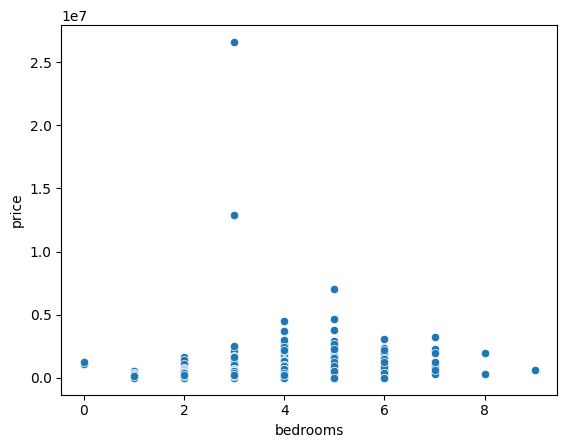

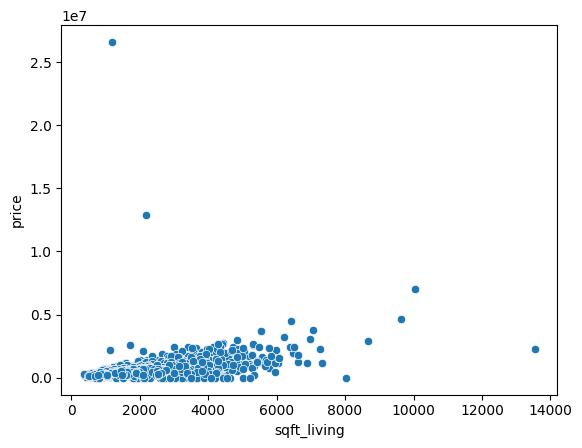

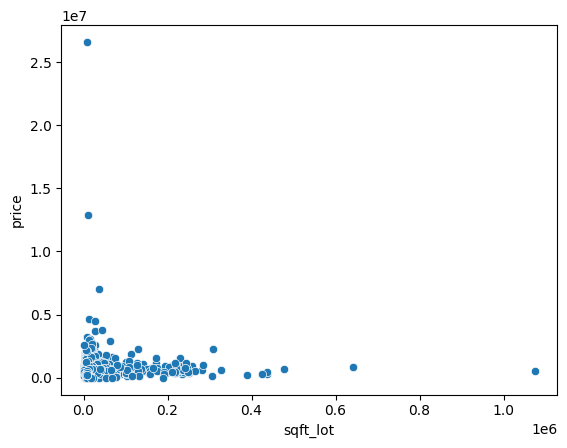

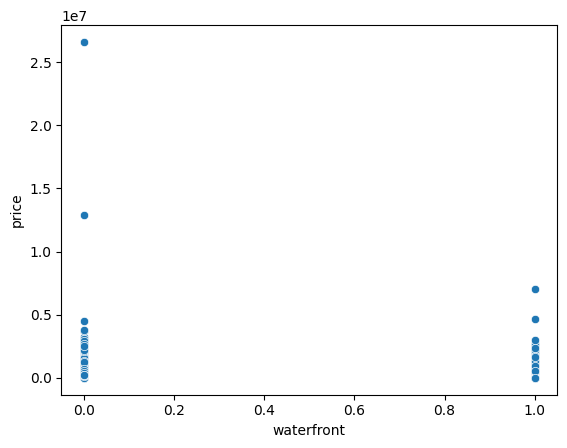

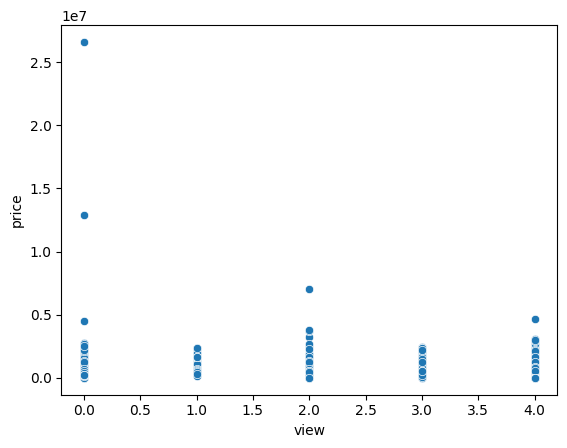

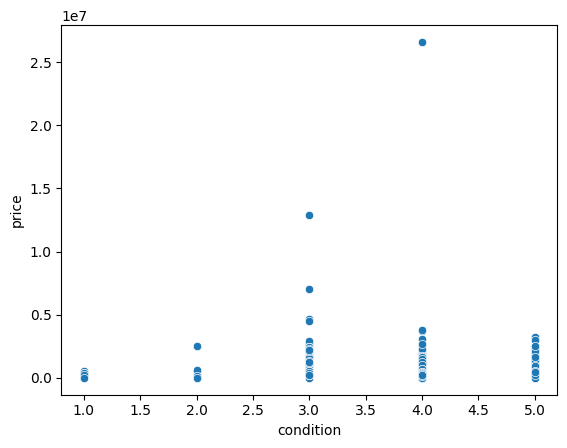

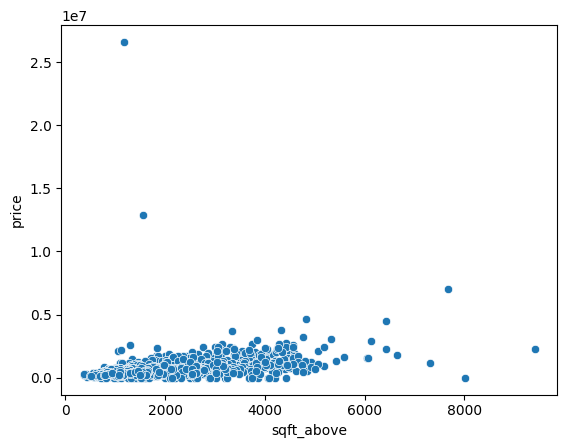

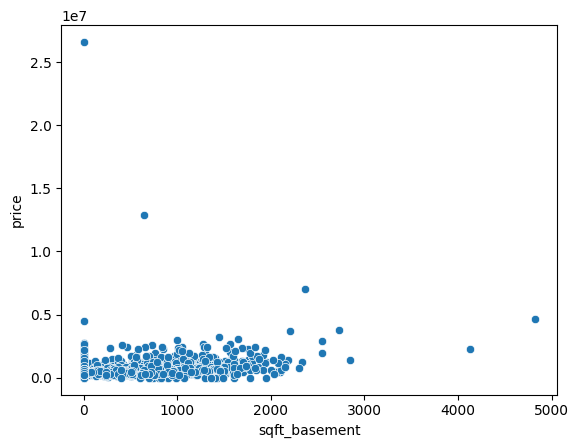

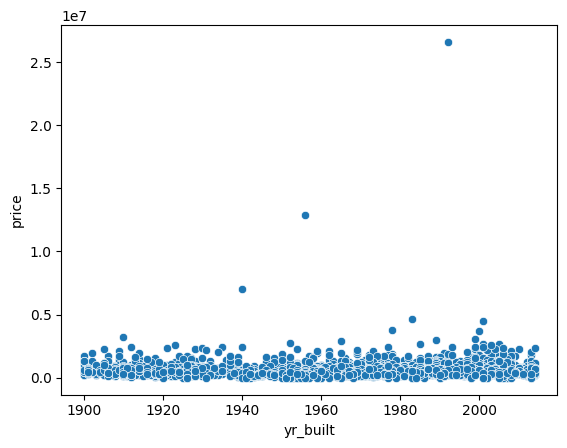

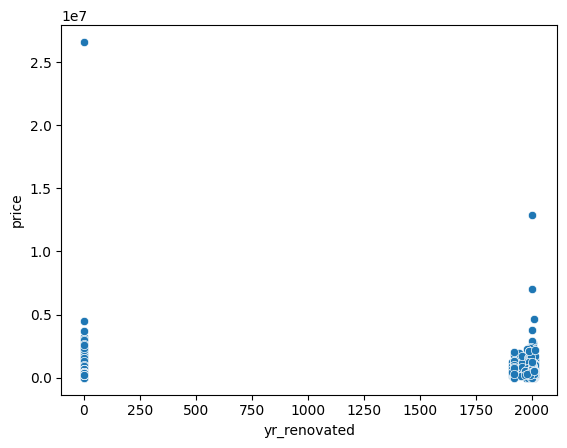

In [ ]:
for k in flts+ints:
  sns.scatterplot(x=df[k], y=df['price'])
  plt.show()

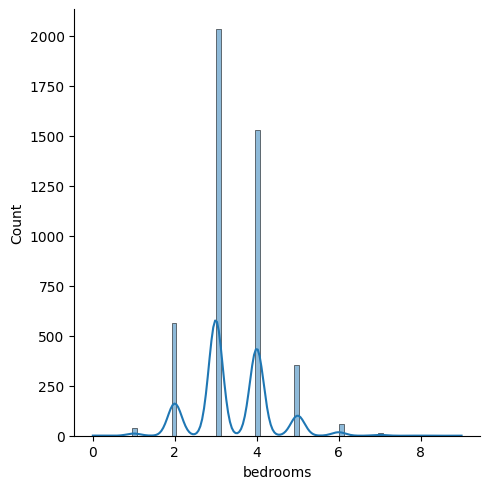

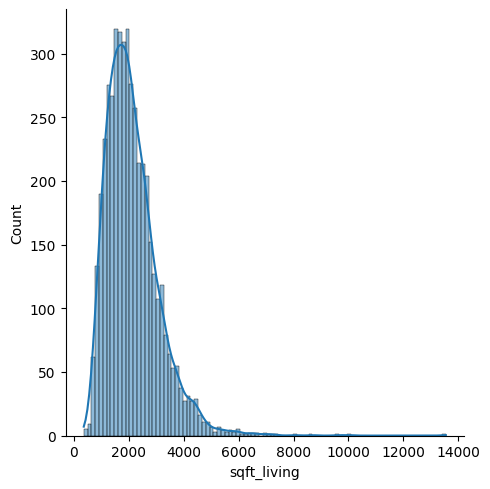

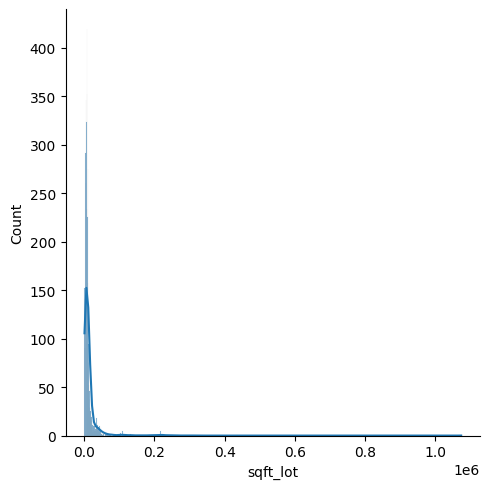

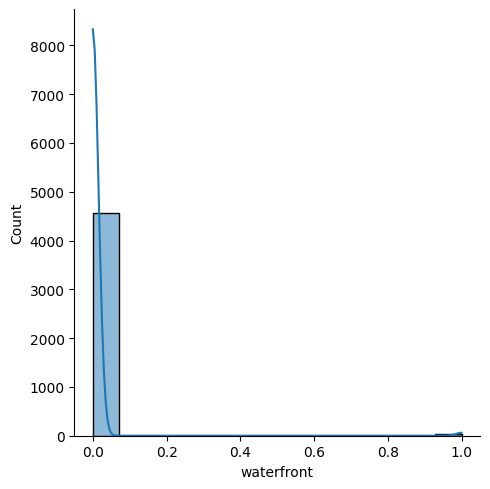

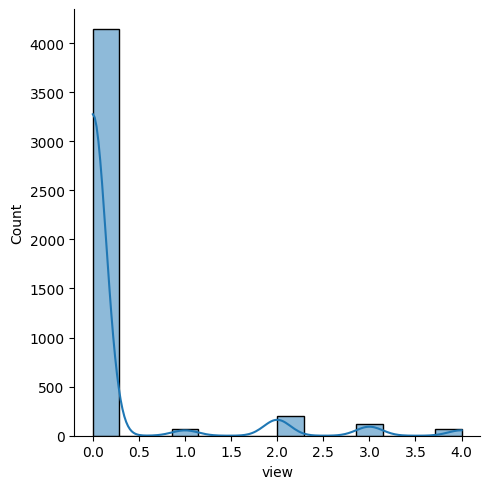

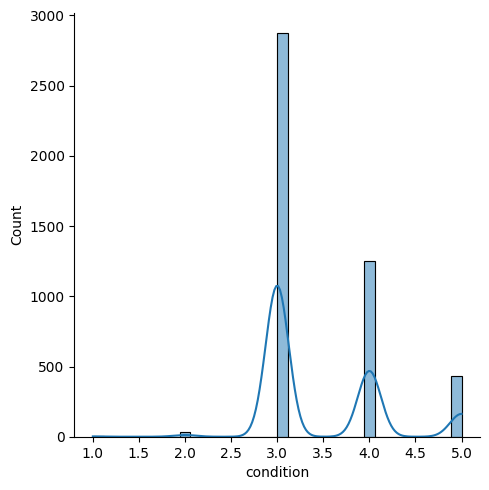

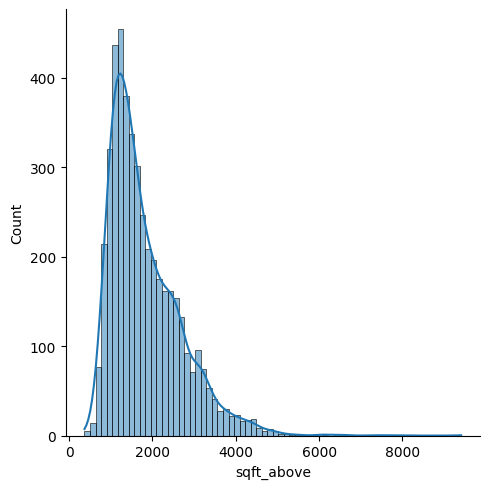

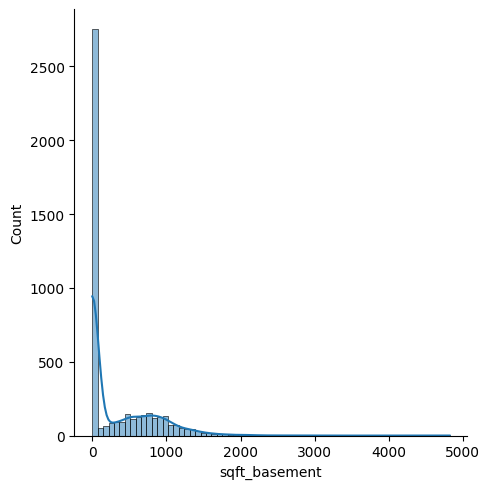

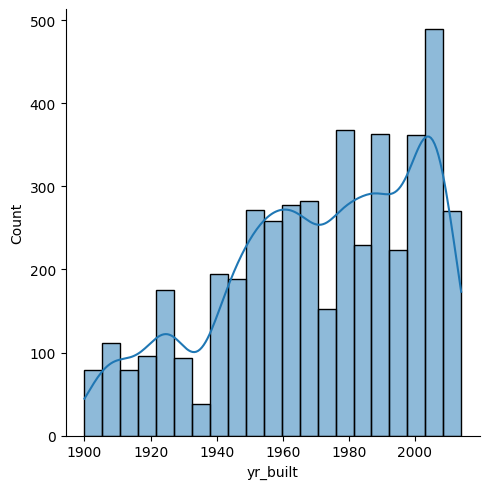

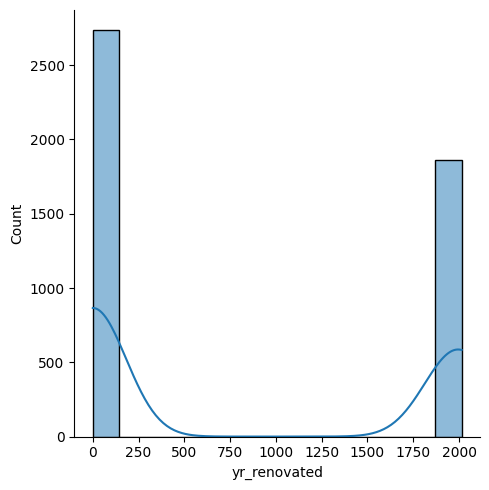

In [ ]:
for i in ints:
  sns.displot(data=df,x=df[i],kde=True)
  plt.show()

#### Binning
The columns of year built and square feet above

In [ ]:
df.yr_built_binned = pd.cut(df.yr_built, bins=range(1900,2021,20), labels=range(1910, 2011, 20))

<ipython-input-16-59f15cc5cf55>:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df.yr_built_binned = pd.cut(df.yr_built, bins=range(1900,2021,20), labels=range(1910, 2011, 20))


In [ ]:
df.yr_built_binned.value_counts().sort_index().plot(kind='bar')

plt.show()

#### Scaling data using MinMax and Standard Scaler

In [103]:
from sklearn.preprocessing import MinMaxScaler,StandardScaler
min=MinMaxScaler()
stan=StandardScaler()
df_std = df.copy()
df_min = df.copy()
for i in ints+flts:
  df_min[i+'_min'] = min.fit_transform(np.array(df[i]).reshape(-1,1))
  df_min = df_min.drop(i,axis=1)
  df_std[i+'_std'] = stan.fit_transform(np.array(df[i]).reshape(-1,1))
  df_std=df_std.drop(i,axis=1)
df_std.head()

,price,street,city,statezip,country,bedrooms_std,sqft_living_std,sqft_lot_std,waterfront_std,view_std,condition_std,sqft_above_std,sqft_basement_std,yr_built_std,yr_renovated_std,bathrooms_std,floors_std
0,313000.0,18810 Densmore Ave N,Shoreline,WA 98133,USA,-0.441122,-0.829971,-0.193434,-0.085004,-0.309194,-0.667112,-0.565224,-0.672464,-0.531014,1.221670,-0.843204,-0.022416
1,2384000.0,709 W Blaine St,Seattle,WA 98119,USA,1.759705,1.568528,-0.161718,-0.085004,4.830079,2.286416,1.789559,-0.069128,-1.674693,-0.825693,0.432802,0.906555
2,342000.0,26206-26214 143rd Ave SE,Kent,WA 98042,USA,-0.441122,-0.217367,-0.080978,-0.085004,-0.309194,0.809652,0.119171,-0.672464,-0.161000,-0.825693,-0.205201,-0.951388
3,420000.0,857 170th Pl NE,Bellevue,WA 98008,USA,-0.441122,-0.144686,-0.190145,-0.085004,-0.309194,0.809652,-0.959621,1.482306,-0.261913,-0.825693,0.113800,-0.951388
4,550000.0,9105 170th Ave NE,Redmond,WA 98052,USA,0.659291,-0.206984,-0.121306,-0.085004,-0.309194,0.809652,-0.797222,1.051352,0.175376,1.208396,0.432802,-0.951388


#### Plotting scaled data

In [ ]:
for i in ints+flts:
  sns.displot(df_min[i+'_min'],kde=True)

In [ ]:
for i in ints+flts:
  sns.displot(df_std[i+'_std'],kde=True)
  plt.show()

#### KNN & Naive Bayes

In [149]:
from sklearn.neighbors import KNeighborsClassifier as knn
kn = knn(n_neighbors = 3, weights="uniform", algorithm = "auto", leaf_size= 30, p= 2, metric = "minkowski")

In [12]:
from sklearn.model_selection import train_test_split as ttt
import tqdm


In [94]:
print("Converting the price column into binary category as 1 > mean and 0 < mean with mean = %d" %df_std.price.mean())

Converting the price column into binary category as 1 > mean and 0 < mean with mean = 551962


In [108]:
df_std = df_std.drop(objs,axis=1)

In [104]:
mean = df_std.price.mean()
df_std['price'] = [1 if x >= mean else 0 for x in df_std['price']]

In [105]:
df_std.price.value_counts()

0    2925
1    1675
Name: price, dtype: int64

In [143]:
X = df_std.drop('price',axis=1)
y = df_std['price']
xtr,xte,ytr,yte = ttt(X,y, test_size=0.25, stratify=y)

In [144]:
ytr.value_counts()[0]/ytr.value_counts()[1],yte.value_counts()[0]/yte.value_counts()[1]

(1.7468152866242037, 1.7446300715990453)

In [153]:
kn.fit(xtr,ytr)
acc = kn.score(X=xte, y=yte)
acc

0.7452173913043478

In [155]:
nbors = list(range(3,17,2))
for i in nbors:
  mod = knn(n_neighbors=i)
  mod.fit(xtr,ytr)
  print(f"Accuracy for {i} neighbours is {mod.score(xte,yte)}")

Accuracy for 3 neighbours is 0.7452173913043478
Accuracy for 5 neighbours is 0.7634782608695653
Accuracy for 7 neighbours is 0.7704347826086957
Accuracy for 9 neighbours is 0.7695652173913043
Accuracy for 11 neighbours is 0.7747826086956522
Accuracy for 13 neighbours is 0.768695652173913
Accuracy for 15 neighbours is 0.7739130434782608


In [156]:
from sklearn.naive_bayes import GaussianNB as nb


In [157]:
clf = nb()
clf.fit(xtr,ytr)
clf.score(xte,yte)


0.7539130434782608